In [70]:
cd(@__DIR__)
include("table_reader.jl")
include("utils.jl")

PlotYearCurves (generic function with 9 methods)

In [71]:
series=extract_series("TX_STAID000031.txt",plot=false)

38758×2 DataFrame
   Row │ DATE        TX      
       │ Date        Float64 
───────┼─────────────────────
     1 │ 1897-01-01     11.6
     2 │ 1897-01-02     12.3
     3 │ 1897-01-03     13.0
     4 │ 1897-01-04     10.2
     5 │ 1897-01-05     14.0
     6 │ 1897-01-06     11.6
     7 │ 1897-01-07     15.5
     8 │ 1897-01-08     15.1
   ⋮   │     ⋮          ⋮
 38752 │ 2003-03-25     15.1
 38753 │ 2003-03-26     14.3
 38754 │ 2003-03-27     16.3
 38755 │ 2003-03-28     19.2
 38756 │ 2003-03-29     19.7
 38757 │ 2003-03-30     18.3
 38758 │ 2003-03-31     19.0
           38743 rows omitted

In [72]:
years=unique(Dates.year.(series.DATE))

107-element Vector{Int64}:
 1897
 1898
 1899
 1900
 1901
 1902
 1903
 1904
 1905
 1906
    ⋮
 1995
 1996
 1997
 1998
 1999
 2000
 2001
 2002
 2003

## Segmenting the dataset by month

In [ ]:
include("utils/Separation.jl")
Monthly_date=MonthlySeparateDates(series.DATE)
Monthly_temp=MonthlySeparateX(series.TX,series.DATE)

12-element Vector{Vector{Any}}:
 [[11.6, 12.3, 13.0, 10.2, 14.0, 11.6, 15.5, 15.1, 14.7, 15.8  …  9.0, 2.5, 0.0, 3.8, 10.4, 10.9, 5.1, 5.1, 7.5, 6.0], [11.3, 12.4, 15.7, 14.1, 13.9, 12.2, 12.4, 12.8, 12.4, 13.1  …  14.0, 16.1, 12.2, 15.5, 12.5, 12.7, 14.8, 12.7, 10.7, 16.0], [9.8, 15.2, 9.1, 11.8, 15.7, 15.4, 14.1, 14.3, 14.7, 15.4  …  15.6, 15.3, 10.1, 5.5, 2.7, 8.1, 8.3, 11.9, 10.5, 13.9], [15.8, 17.8, 18.8, 13.8, 12.1, 12.8, 11.0, 11.0, 11.4, 9.3  …  15.1, 17.6, 13.2, 12.7, 13.4, 11.5, 8.4, 6.4, 7.9, 10.3], [11.1, 10.7, 7.6, 6.3, 4.5, 4.1, 5.3, 9.9, 9.8, 10.8  …  14.5, 12.9, 14.2, 13.9, 12.8, 12.5, 14.6, 12.8, 8.7, 8.1], [14.7, 9.8, 16.0, 17.6, 14.3, 12.3, 13.2, 13.5, 11.8, 8.4  …  11.9, 14.7, 11.7, 13.0, 7.2, 10.1, 13.5, 11.6, 7.8, 8.0], [8.5, 11.0, 14.7, 14.6, 15.5, 15.0, 14.7, 15.3, 16.1, 16.0  …  12.6, 11.0, 11.0, 13.3, 13.8, 13.8, 13.8, 12.4, 13.4, 14.5], [12.9, 14.3, 14.0, 10.8, 12.0, 12.7, 12.5, 14.3, 9.5, 7.9  …  10.9, 13.3, 12.0, 14.5, 12.0, 13.4, 12.4, 13.9, 12.1, 11.8], [

# I. Series filtered by removing monthly drift

## Monthly Drift

In [74]:
Monthly_trend, Monthly_undrifted = [[] for _ in 1:12], [[] for _ in 1:12]

for i in 1:12
    for month_temp in Monthly_temp[i]
        N=length(month_temp)
        X=cat(ones(N),1:N,dims=2)
        beta=inv(transpose(X)*X)*transpose(X)*month_temp
        append!(Monthly_trend[i],[X*beta])
        append!(Monthly_undrifted[i],[month_temp-X*beta])
    end
end

In [75]:
Monthly_undrifted

12-element Vector{Vector{Any}}:
 [[-3.6175403225806484, -2.6183064516129058, -1.6190725806451631, -4.119838709677422, -0.020604838709679996, -2.121370967741937, 2.077862903225805, 1.9770967741935461, 1.8763306451612873, 3.2755645161290303  …  0.06637096774193552, -6.134395161290323, -8.335161290322581, -4.23592741935484, 2.663306451612903, 3.4625403225806455, -2.0382258064516137, -1.738991935483872, 0.9602419354838716, -0.24052419354838683], [-2.506451612903211, -1.4238709677419212, 1.858709677419366, 0.24129032258065664, 0.023870967741947524, -1.6935483870967651, -1.510967741935474, -1.1283870967741834, -1.5458064516128935, -0.8632258064516041  …  -0.17225806451612868, 1.910322580645163, -2.007096774193549, 1.2754838709677419, -1.741935483870968, -1.5593548387096803, 0.5232258064516113, -1.5941935483871, -3.6116129032258115, 1.6709677419354794], [-4.831250000000015, 0.6936290322580501, -5.281491935483883, -2.4566129032258175, 1.5682661290322457, 1.3931451612903132, 0.21802419354837888

Presence of missing values in February 1956 !

In [76]:
print(length.(Monthly_temp[2]))
findall(x->x==22,length.(Monthly_temp[2]))
#println(Monthly_date[2][60])

[28, 28, 28, 28, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 26, 28, 28, 29, 28, 28, 28, 29, 27, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 27, 28, 22, 27, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28, 29, 28, 28, 28]

1-element Vector{Int64}:
 60

Exemple in 1980

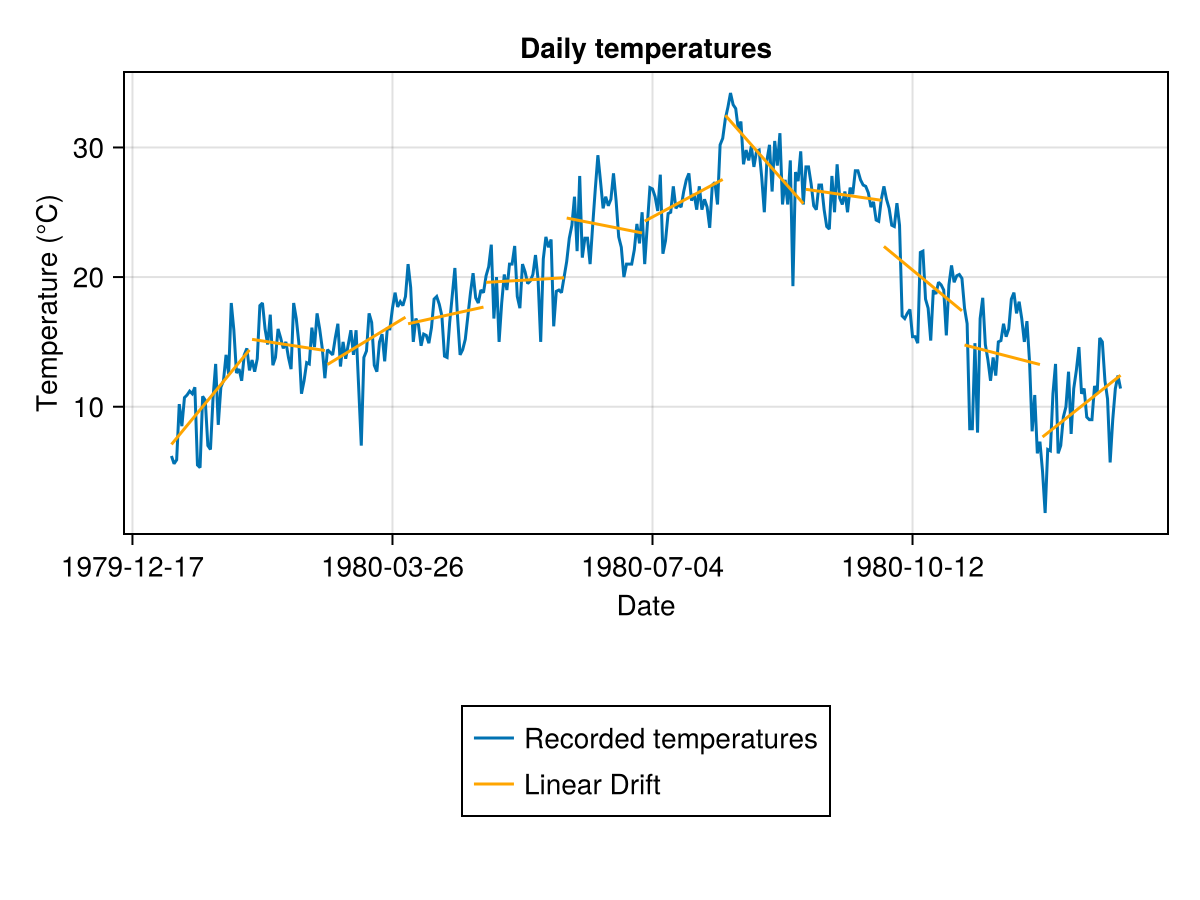

In [77]:
year_index=findall(x->x==1980,years)[1]
fig=Figure()
ax, plot1=lines(fig[1:2, 1:2], series.DATE[Iyear(series.DATE,1980)], series[Iyear(series.DATE,1980),2])
for i in 1:11
    plot2=lines!(ax,Monthly_date[i][year_index],Monthly_trend[i][year_index] ; color="orange")
end
plot2=lines!(ax,Monthly_date[12][year_index],Monthly_trend[12][year_index] ; color="orange")
ax.title="Daily temperatures"
ax.xlabel="Date"
ax.ylabel="Temperature (°C)"
Legend(fig[3, 1:2],[plot1,plot2],["Recorded temperatures","Linear Drift"])
current_figure()

In [78]:
N=size(series)[1]
X=cat(ones(N),1:N,dims=2)
beta=inv(transpose(X)*X)*transpose(X)*series[!,2]
undrifted_series=series[!,2]-X*beta
k=N ÷ 365 #k : number of years
average_period=mean(undrifted_series[i:364+i] for i in 1:365:(k-1)*365)

365-element Vector{Float64}:
 -7.840852999024626
 -7.86848226167774
 -7.472302000521335
 -7.786597929841122
 -7.358036716303765
 -7.416142169433068
 -7.493295241609997
 -7.134257837596449
 -7.360934719297186
 -7.45713541052173
  ⋮
 -8.060680027343965
 -7.8959283376161356
 -7.814986171697822
 -7.5330916248271285
 -7.524530411289771
 -8.095969197752408
 -7.9950270318341
 -7.9178943897253165
 -7.976952223807

## Autocorrelations

### ACF

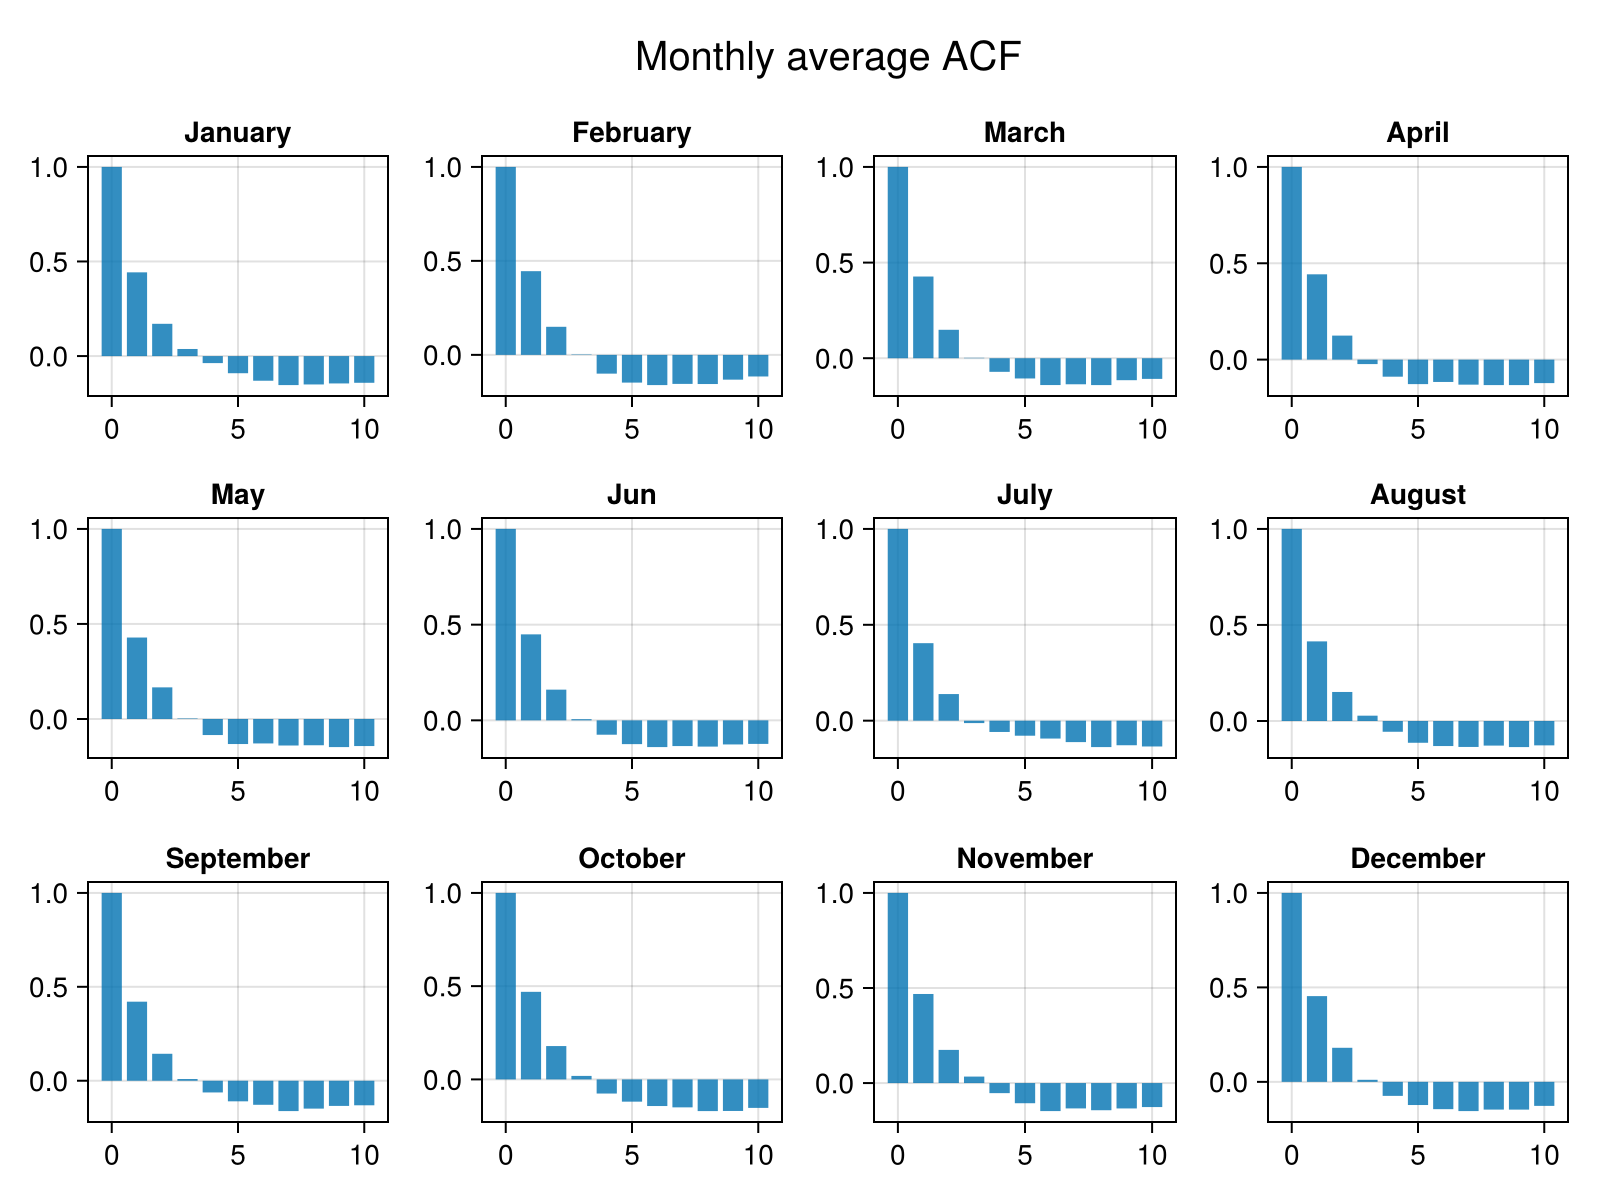

In [79]:
fig=Figure(size=(800,600))
supertitle=Label(fig[1, 1:4], "Monthly average ACF", fontsize = 20)
for i in 1:12
    autocor_vec=[autocor(Monthly_undrifted[i][j] ,0:10) for j in eachindex(Monthly_undrifted[i])] #One element per year
    ax,plot=barplot(fig[((i-1) ÷ 4) + 2, (i-1) % 4 + 1], 0:10, mean(autocor_vec) )
    ax.title=Month_vec[i]
end
current_figure()

### PACF

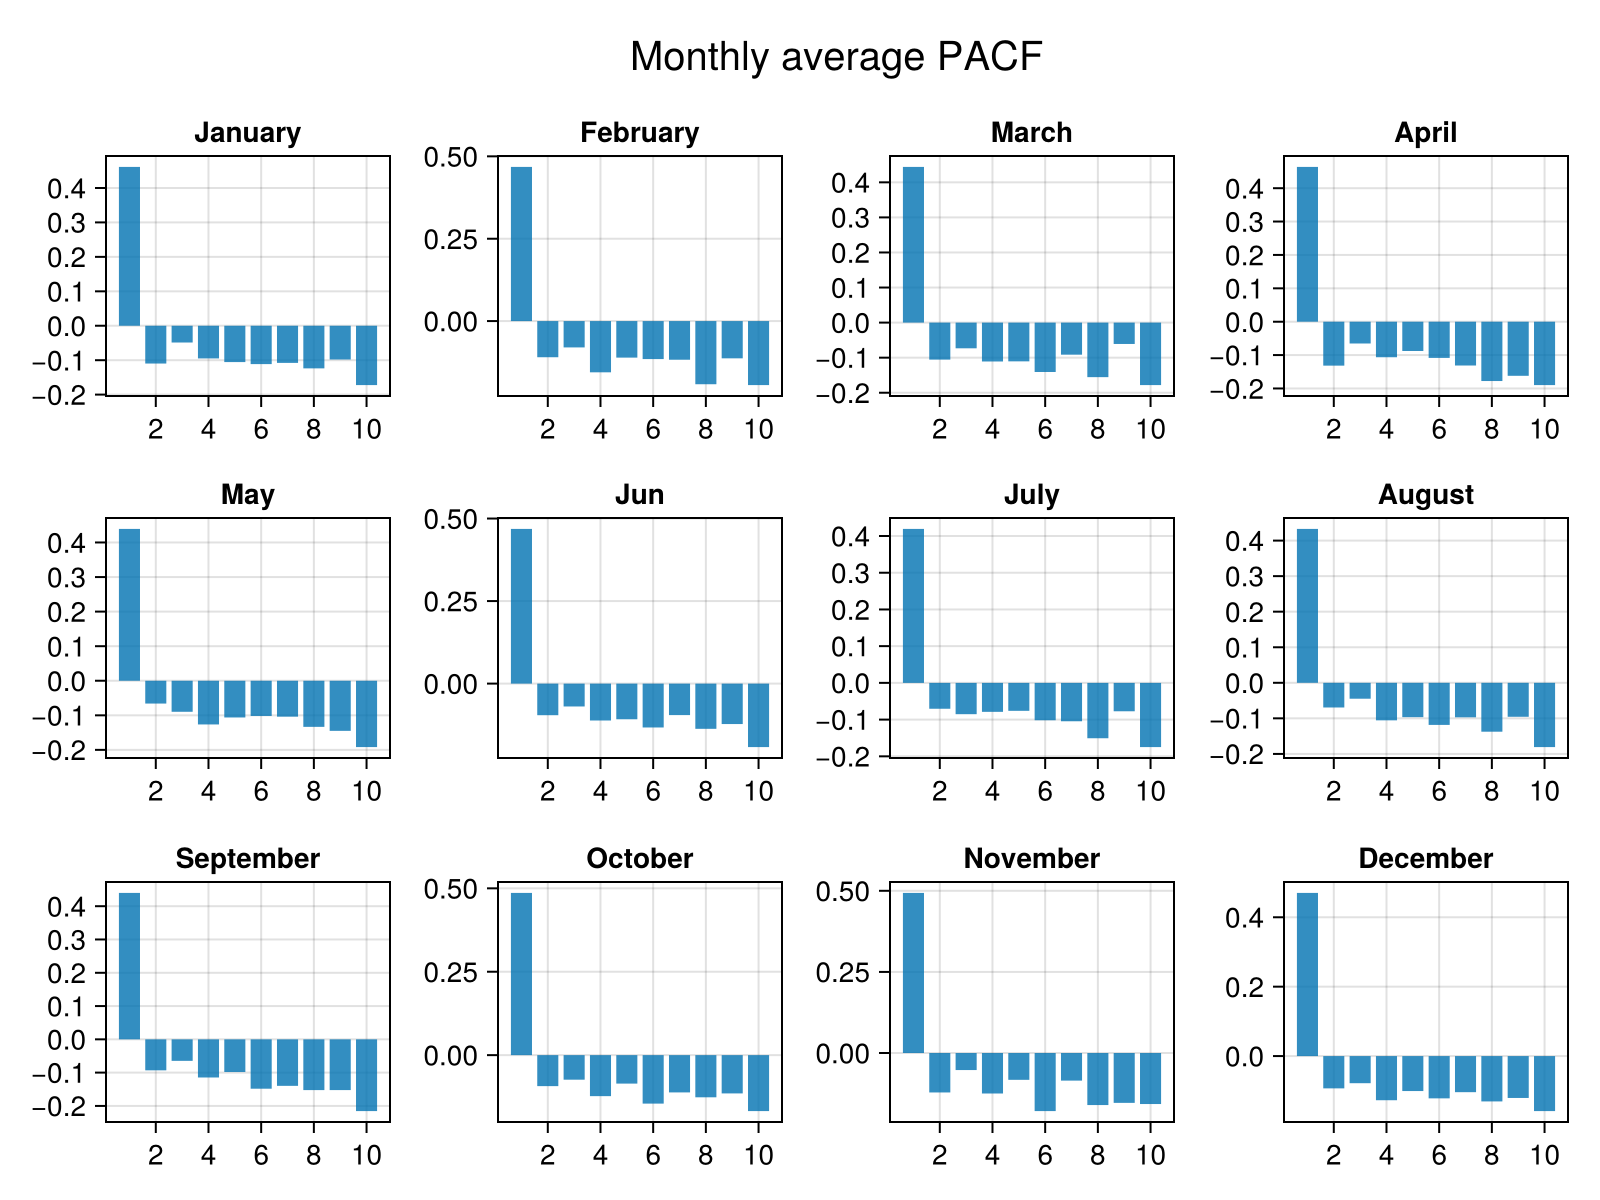

In [80]:
fig=Figure(size=(800,600))
supertitle=Label(fig[1, 1:4], "Monthly average PACF", fontsize = 20)
for i in 1:12
    pacf_vec=[pacf(Monthly_undrifted[i][j] ,1:10) for j in eachindex(Monthly_undrifted[i])] #One element per year
    ax,plot=barplot(fig[((i-1) ÷ 4) + 2, (i-1) % 4 + 1], 1:10, mean(pacf_vec) )
    ax.title=Month_vec[i]
end
current_figure()

For each month, it still looks like an AR(1) model

## Estimation

In [81]:
include(raw"utils\Estimation.jl")
Monthly_Estimators = MonthlyEstimation(Monthly_undrifted)
Φ_month_vec = [[month_param[1] for month_param in Monthly_Estimators[i]] for i in 1:12]
σ_month_vec = [[month_param[2] for month_param in Monthly_Estimators[i]] for i in 1:12]

12-element Vector{Vector{Float64}}:
 [2.655473981669362, 1.620861189956432, 2.5281466715512204, 2.1200823744815644, 1.9207348124940467, 2.2898571642361154, 2.3207918187519527, 1.9415543399884294, 2.5396060950017425, 2.0024215591518053  …  1.7615606878035486, 2.349267397494767, 1.6900152160768156, 1.9507920578450755, 1.465451792166842, 2.0700044985297046, 1.9508706813568606, 1.9499191192764196, 1.7312207670459037, 3.149850012109565]
 [1.4223918248232588, 2.442382115708537, 1.9280098967424972, 2.7623435288733056, 2.0739732348856816, 2.7225987754182768, 2.1490194624312586, 2.874107439570204, 1.6866500396536623, 1.5934195516567031  …  2.1336261114732222, 1.9146249047603763, 2.2954989101215397, 1.6172234126923126, 1.9330351749895, 2.7547541662569017, 2.012931036015814, 1.9780282992362228, 2.278163599650751, 1.9933876112557116]
 [2.205558540621729, 2.8735068920578466, 2.3838904857593173, 2.7543136753155255, 2.4422383228786377, 1.4527084853252488, 1.8000210097510756, 1.844486050481935, 1.5347

In [82]:
Φ_month_mean,σ_month_mean = mean.(Φ_month_vec),mean.(σ_month_vec)
Φ_month_concat,σ_month_concat = MonthlyConcatanatedEstimation(Monthly_undrifted)
Φ_month_sumLL,σ_month_sumLL = MonthlyEstimationSumLL(Monthly_undrifted)

(Any[0.5570858931373567, 0.5143214901045767, 0.4928172344171536, 0.49077687469772235, 0.487953738318779, 0.5008964203127302, 0.449401432475918, 0.4575415932674497, 0.4808992140526616, 0.5324520515335389, 0.5456235106991789, 0.5242144160760138], Any[2.1944155472602542, 2.2177072745998188, 2.0749120751263406, 2.147978745299139, 2.188888229838447, 2.03631014401597, 1.8655015710009204, 1.8354619785455757, 1.817324885277509, 1.9386534103552007, 2.120434170557985, 2.241187538700004])

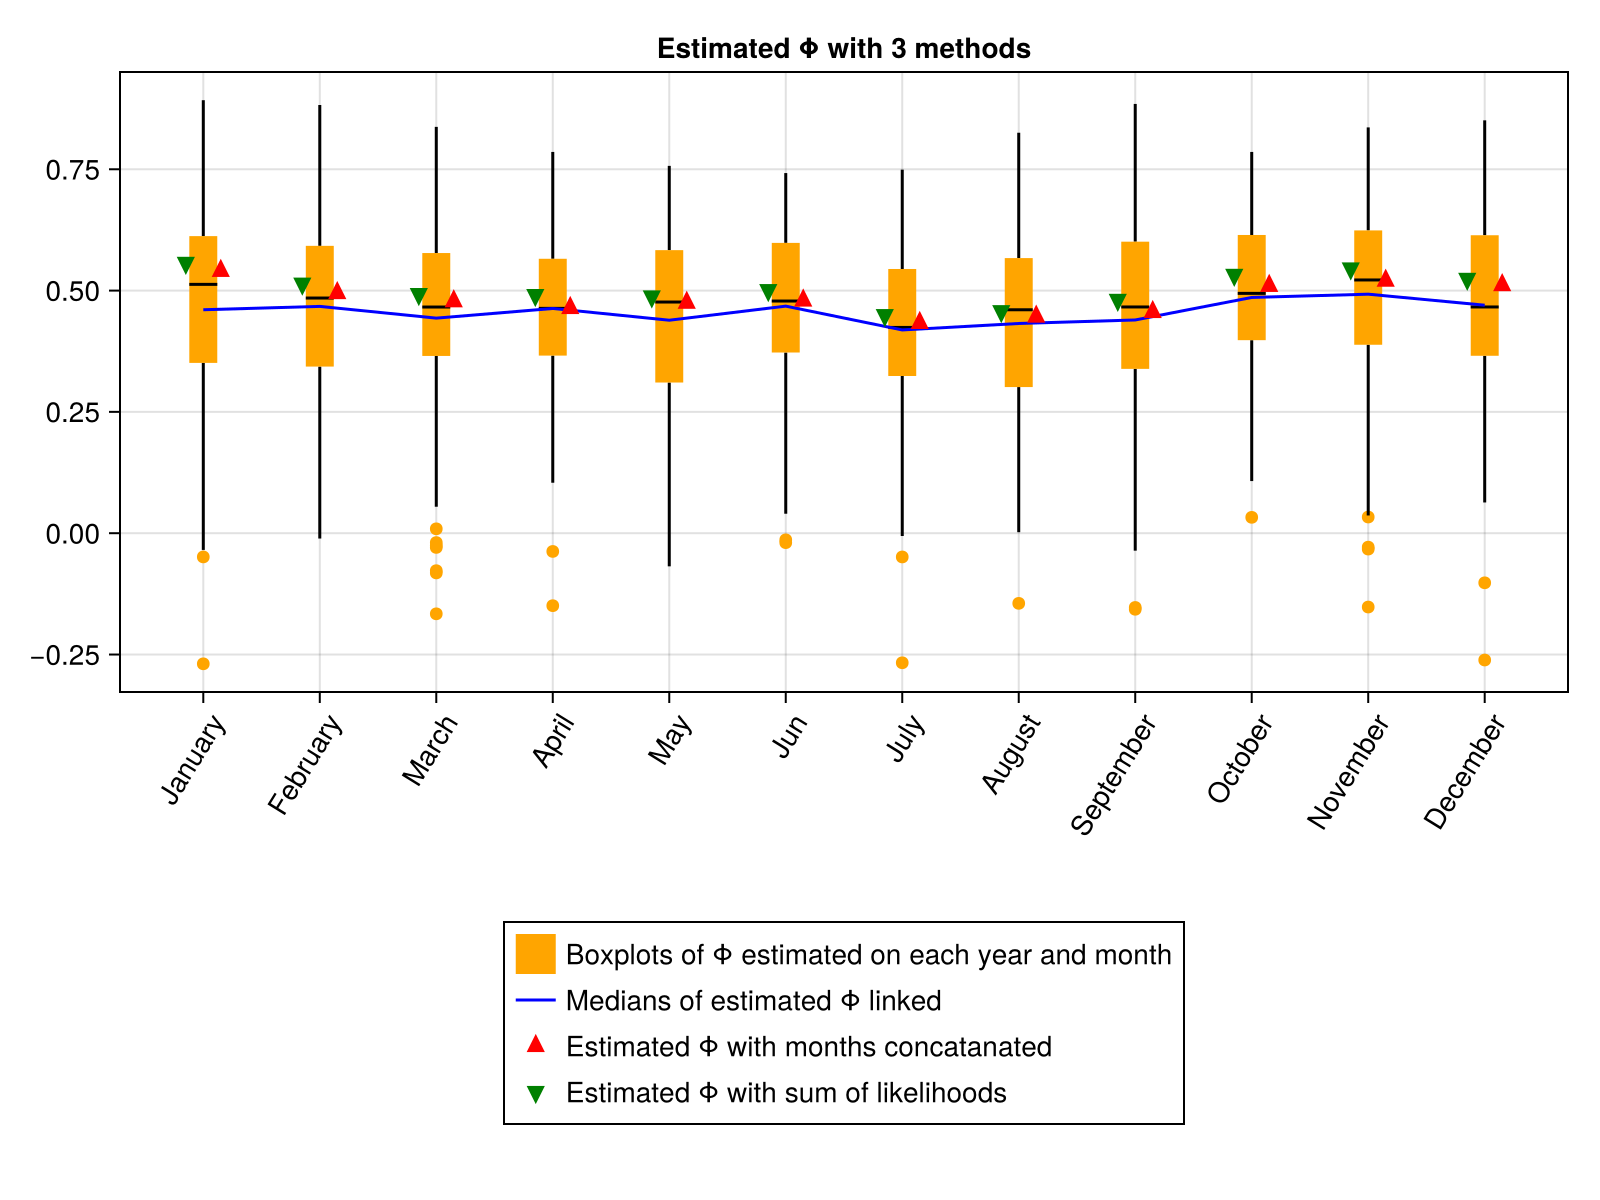

In [ ]:
fig=Figure(size=(800,600))
ax,plt1= boxplot(fig[1:2,1:2],fill(1,length(Φ_month_vec[1])), Φ_month_vec[1] ; width=0.3, color="orange")
for i in 2:12
    boxplot!(ax, fill(i,length(Φ_month_vec[i])), Φ_month_vec[i] ; width=0.3 , color="orange")
end
plt2=lines!(ax,collect(1:12),Φ_month_mean; color="blue")
plt3=scatter!(ax,collect(1:12).+0.15,Φ_month_concat; color="red", marker=:utriangle, markersize=12.5)
plt4=scatter!(ax,collect(1:12).-0.15,Φ_month_sumLL; color="green", marker=:dtriangle, markersize=12.5)
ax.title="Estimated Φ with 3 methods"
ax.xticks=(1:12,Month_vec)
ax.xticklabelrotation=45.0
Legend(fig[3,1:2],[plt1,plt2,plt3,plt4],["Boxplots of Φ estimated on each year and month","Means of estimated Φ linked","Estimated Φ with months concatanated", "Estimated Φ with sum of likelihoods"])
fig

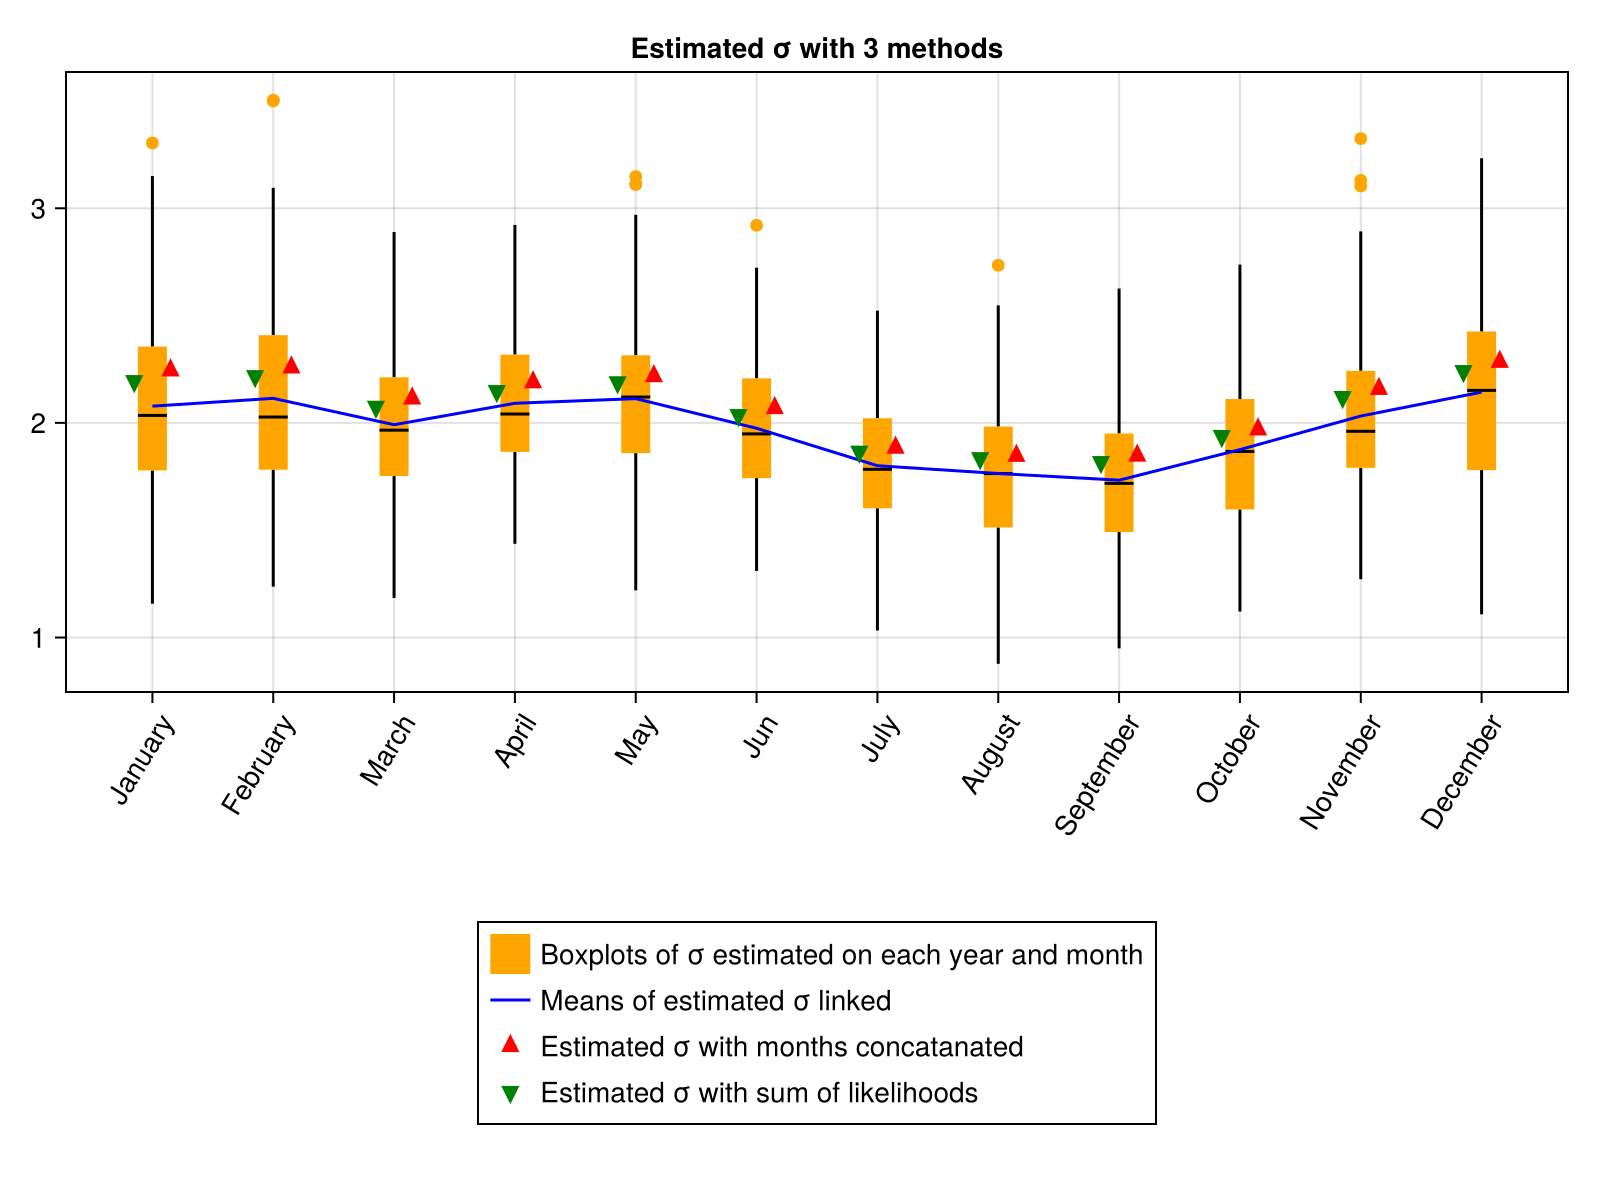

In [84]:
fig=Figure(size=(800,600))
ax,plt1= boxplot(fig[1:2,1:2],fill(1,length(σ_month_vec[1])), σ_month_vec[1] ; width=0.3, color="orange")
for i in 2:12
    boxplot!(ax, fill(i,length(σ_month_vec[i])), σ_month_vec[i] ; width=0.3 , color="orange")
end
plt2=lines!(ax,collect(1:12),σ_month_mean; color="blue")
plt3=scatter!(ax,collect(1:12).+0.15,σ_month_concat; color="red", marker=:utriangle, markersize=12.5)
plt4=scatter!(ax,collect(1:12).-0.15,σ_month_sumLL; color="green", marker=:dtriangle, markersize=12.5)
ax.title="Estimated σ with 3 methods"
ax.xticks=(1:12,Month_vec)
ax.xticklabelrotation=45.0
Legend(fig[3,1:2],[plt1,plt2,plt3,plt4],["Boxplots of σ estimated on each year and month","Means of estimated σ linked","Estimated σ with months concatanated", "Estimated σ with sum of likelihoods"])
fig

## Simulation

### With estimation on each month

In [85]:
sample_ = SimulateYears(Monthly_undrifted[1][1][1],series.DATE[1],Φ_month_mean,σ_month_mean, 100 * 105)
sample_ = invert(sample_ + repeat([average_period],length(sample_))) 

365-element Vector{Vector{Float64}}:
 [-11.458393321605275, -9.65091923082048, -5.95869106995521, -7.401489876600305, -11.097284384832887, -7.605466354558668, -8.882002906961532, -8.279103332357119, -5.8286285869833225, -5.968257327394431  …  -7.650227386226983, -7.028714456911695, -10.905759179900578, -11.240615466733898, -9.10746987726171, -9.004306863906635, -9.697153703712425, -6.20816738073976, -10.272070536343175, -13.277771355160265]
 [-7.4479801499488225, -4.854724974810052, -8.96392773828411, -7.042553440798523, -12.622605463455045, -11.440351809805762, -9.252018784261335, -7.928125083346692, -8.370394901009465, -5.816207868288337  …  -7.143901409543103, -8.559101485954509, -10.259464835561703, -9.021568998982795, -7.48850460521367, -9.062780589921276, -8.005756738996734, -5.125980040060385, -11.518402706795449, -6.096789688180046]
 [-8.145311645512813, -10.670175230751857, -7.37043090439075, -5.710554806953365, -6.634965386663243, -10.565188009997833, -5.94230202681902, -8.58

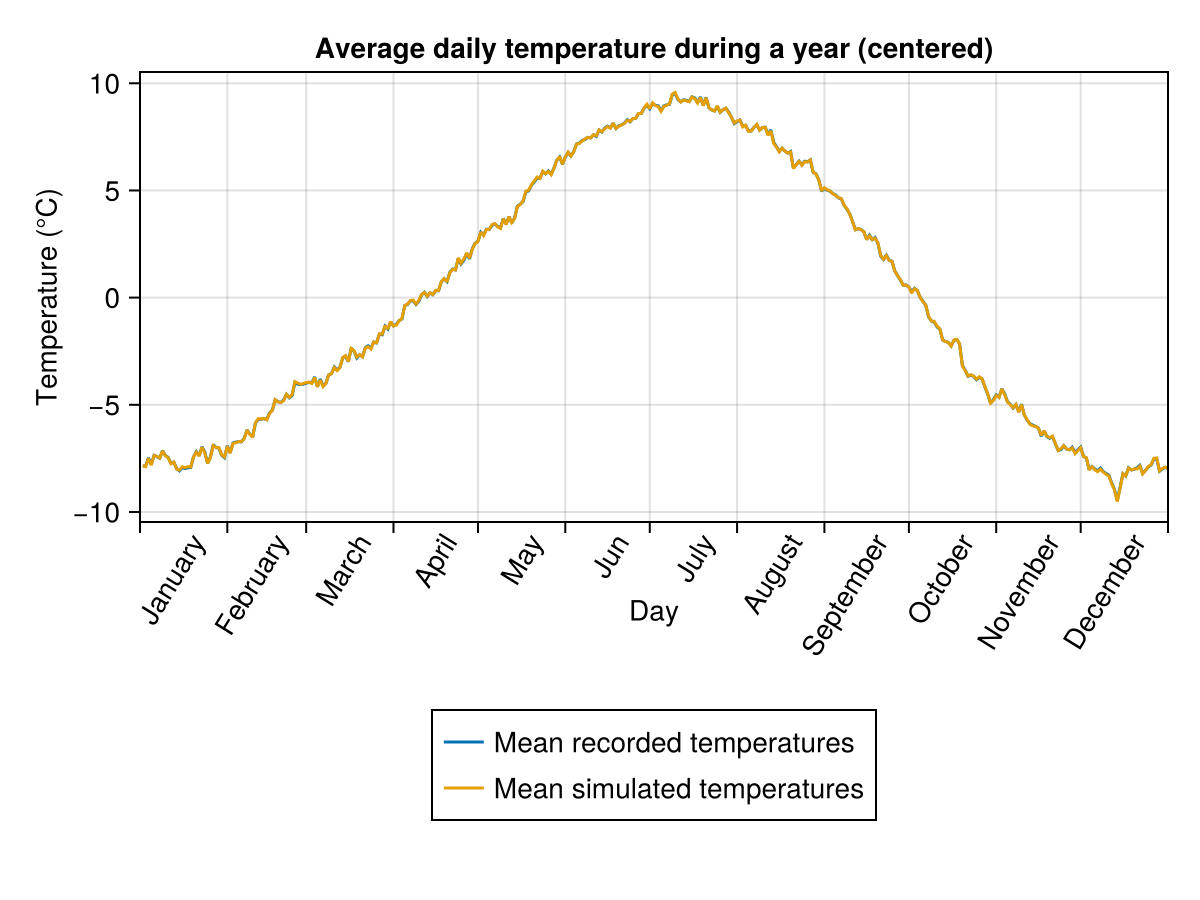

In [86]:
include("utils.jl")
PlotYearCurves([average_period,mean.(sample_)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)")

The generated sample seems to be unbiased.

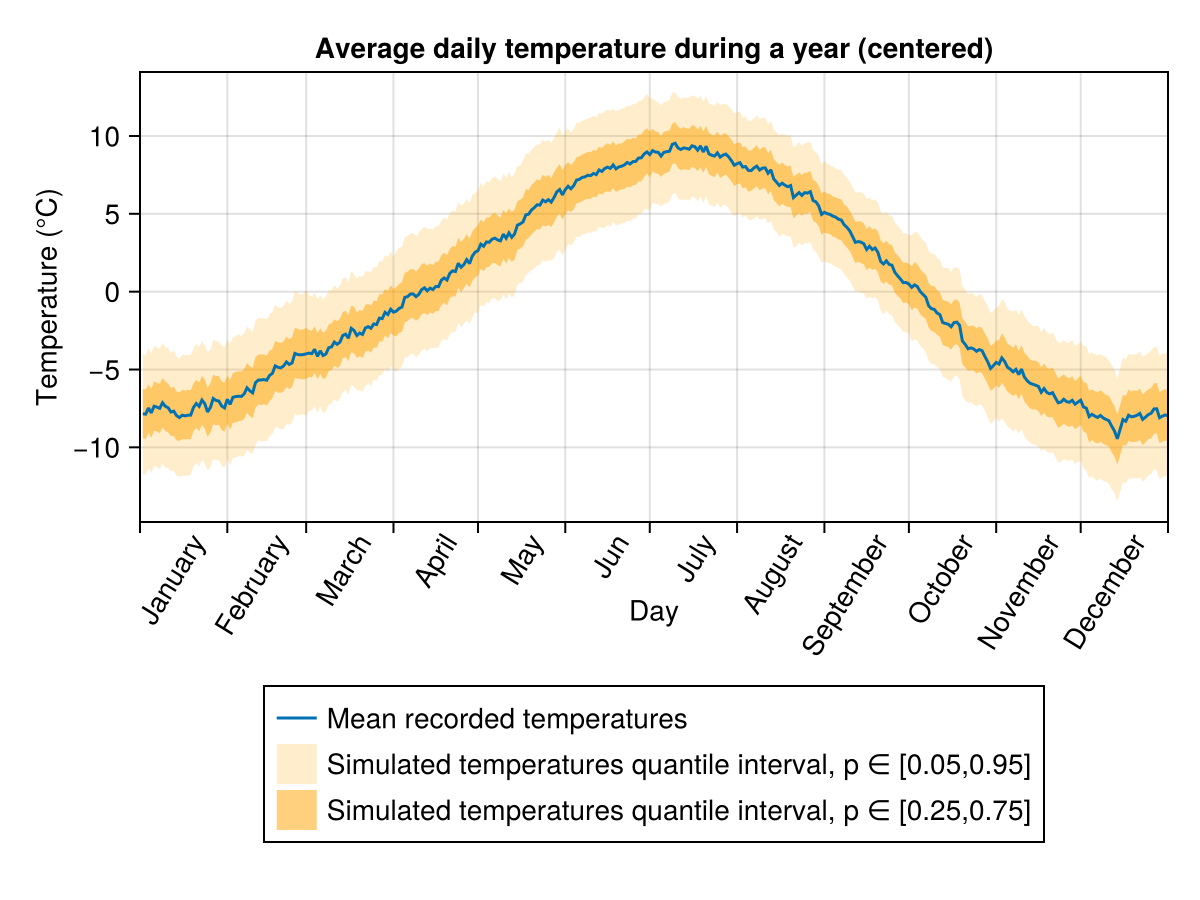

In [87]:
PlotYearCurves(average_period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_,0.05),quantile.(sample_,0.95)),(quantile.(sample_,0.25),quantile.(sample_,0.75))],
[("orange",0.2),("orange",0.5)]
)

The interquartile range seems to change arount the year. Lets plotting it below : 

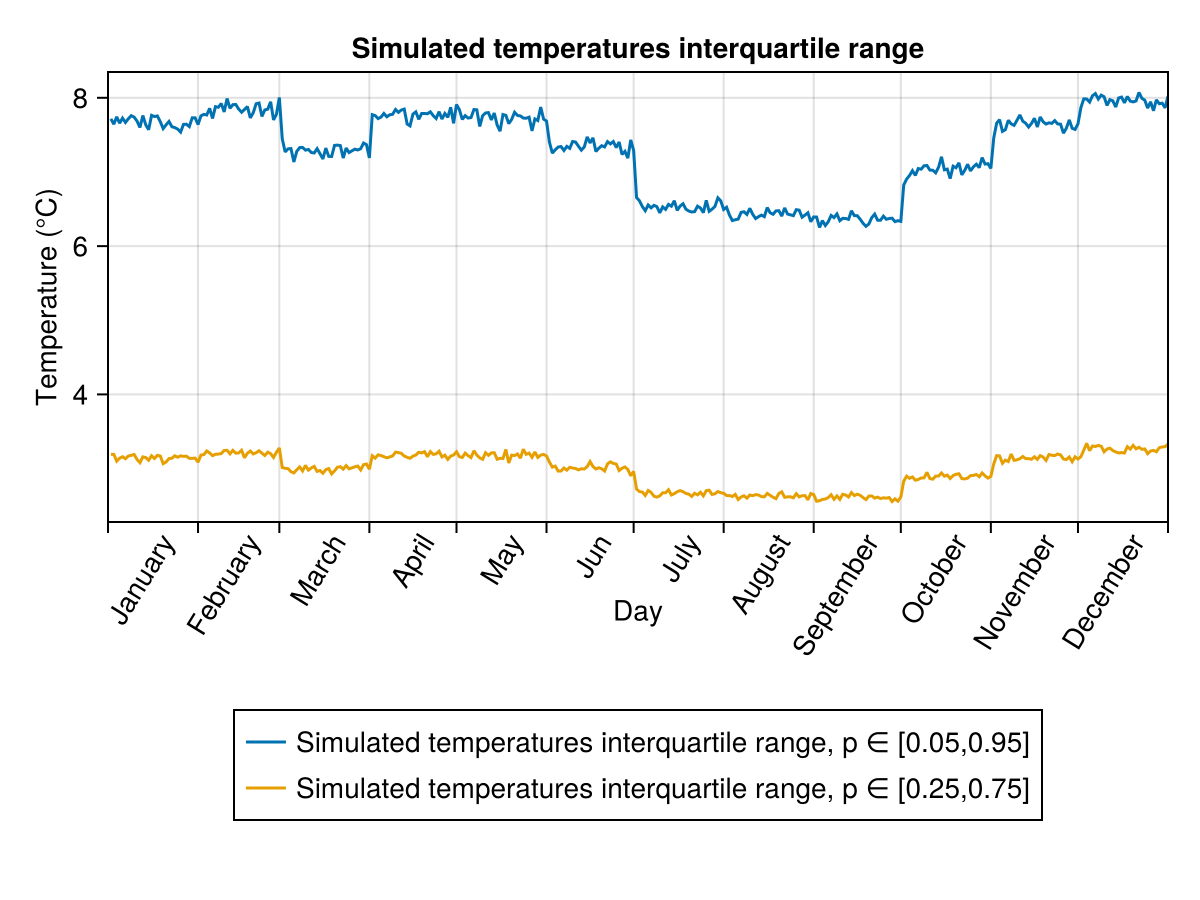

In [88]:
PlotYearCurves([quantile.(sample_,0.95) .- quantile.(sample_,0.05) , quantile.(sample_,0.75) .- quantile.(sample_,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
)

We see clearly that interquartile range is shorter during summer and larger during winter.

### With months concatanation

In [89]:
sample_concat = SimulateYears(Monthly_undrifted[1][1][1],series.DATE[1],Φ_month_concat,σ_month_concat, 100 * 105)
sample_concat = invert(sample_concat + repeat([average_period],length(sample_concat))) 

365-element Vector{Vector{Float64}}:
 [-11.458393321605275, -12.626144558551605, -10.897915616700011, -6.685538528579066, -6.637339868661306, -7.2220045564956115, -4.30313399007308, -6.004468368059676, -13.544287115380374, -9.667311364878206  …  -11.41249486304522, -5.148267525567753, -3.6734237784671393, -8.855819722499676, -0.55355198252468, -8.184850620918553, -5.390803706054733, -7.933779375417683, -5.126164748310144, -7.600179569350253]
 [-6.605821263617512, -8.864011782231788, -9.67759885754759, -3.599955035386631, -11.50192298834348, -3.690494546496411, -8.415619558343517, -9.463597154239492, -12.099098735514765, -7.85223576515085  …  -8.728626955989245, -8.387317652209198, -4.541750222210821, -12.383954178051384, -3.593904133388228, -6.641696119973337, -3.303515381107341, -4.135820684624603, -10.005950385652955, -7.101170654494876]
 [-4.24286727823452, -5.9555422224687895, -7.498262247297128, -6.936845524040459, -8.231683382281187, -3.3854550116529722, -6.316628714528349, -8.70

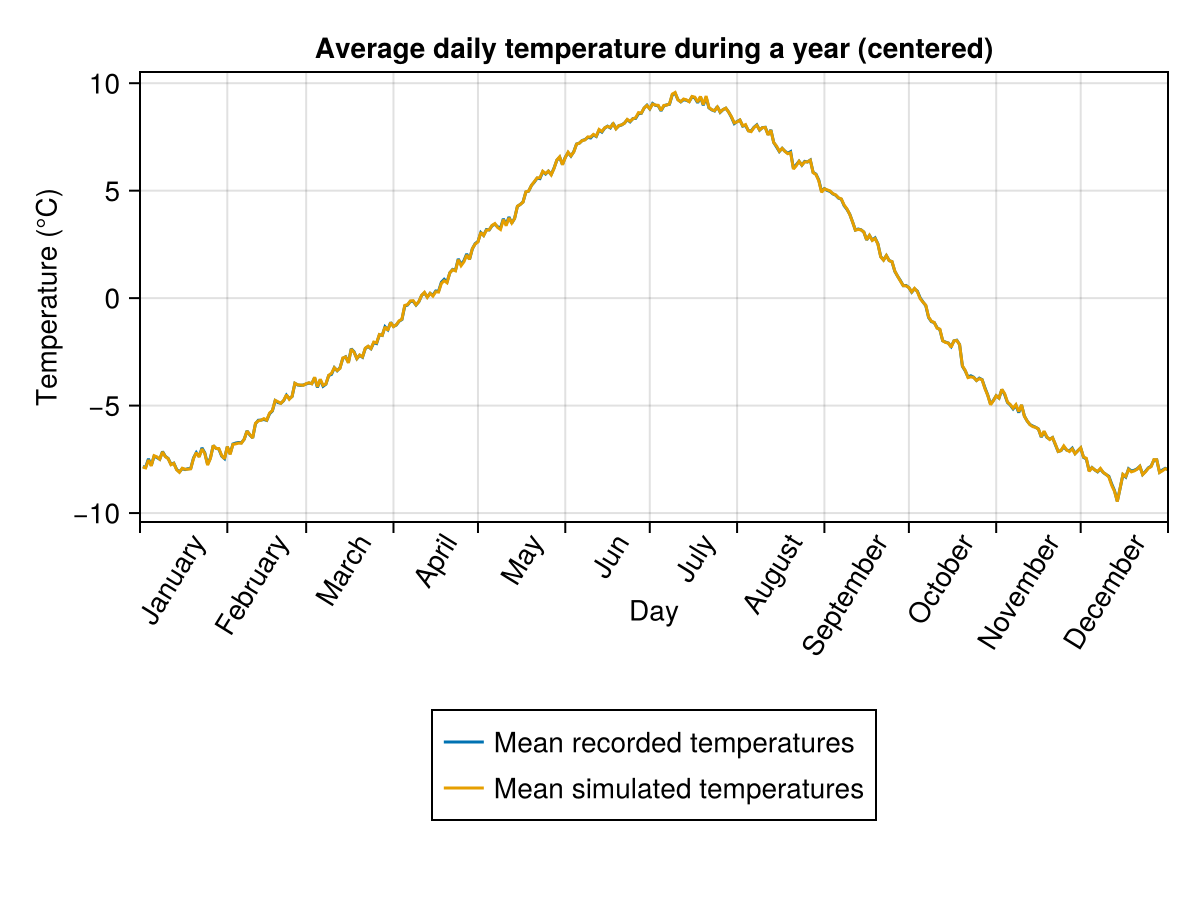

In [90]:
include("utils.jl")
PlotYearCurves([average_period,mean.(sample_concat)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)")

The generated sample seems to be unbiased.

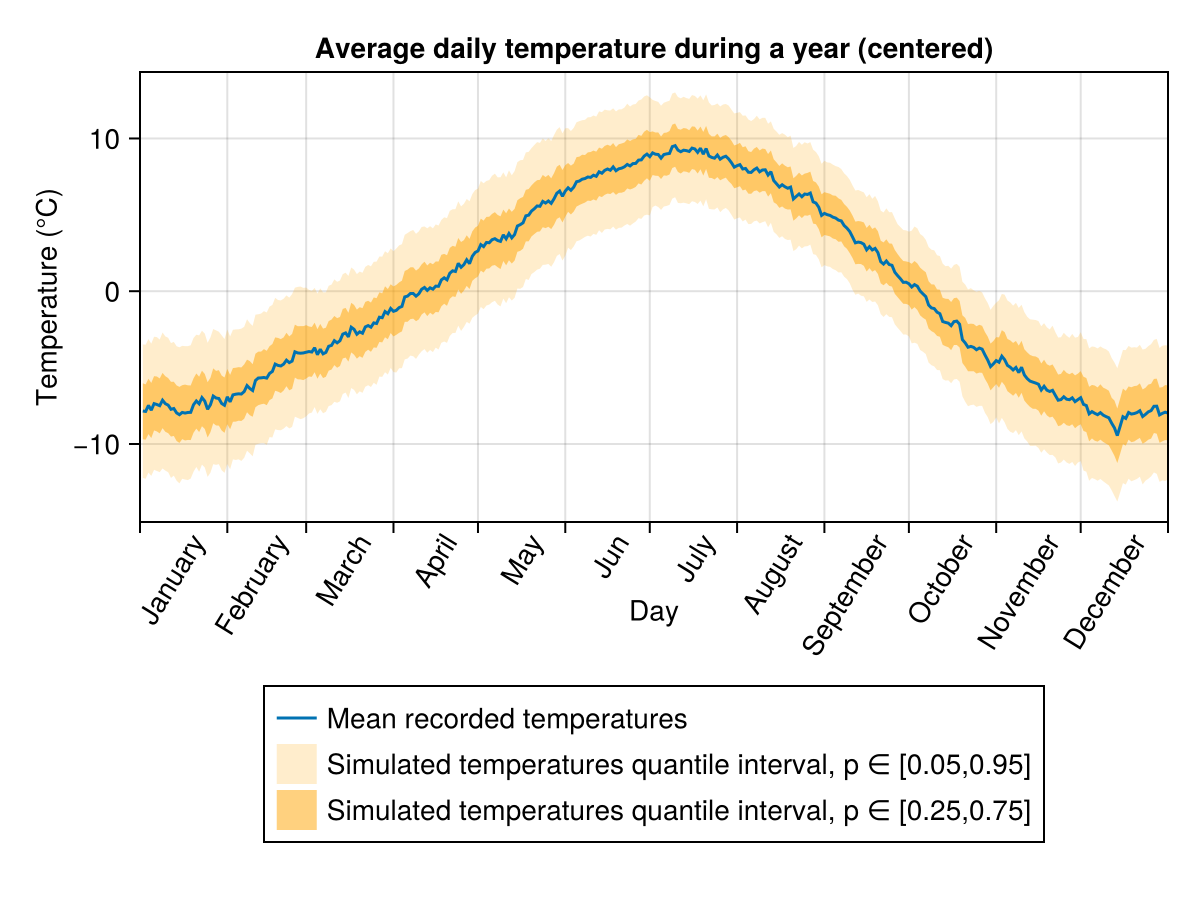

In [91]:
PlotYearCurves(average_period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_concat,0.05),quantile.(sample_concat,0.95)),(quantile.(sample_concat,0.25),quantile.(sample_concat,0.75))],
[("orange",0.2),("orange",0.5)]
)

The interquartile range seems to change arount the year. Lets plotting it below : 

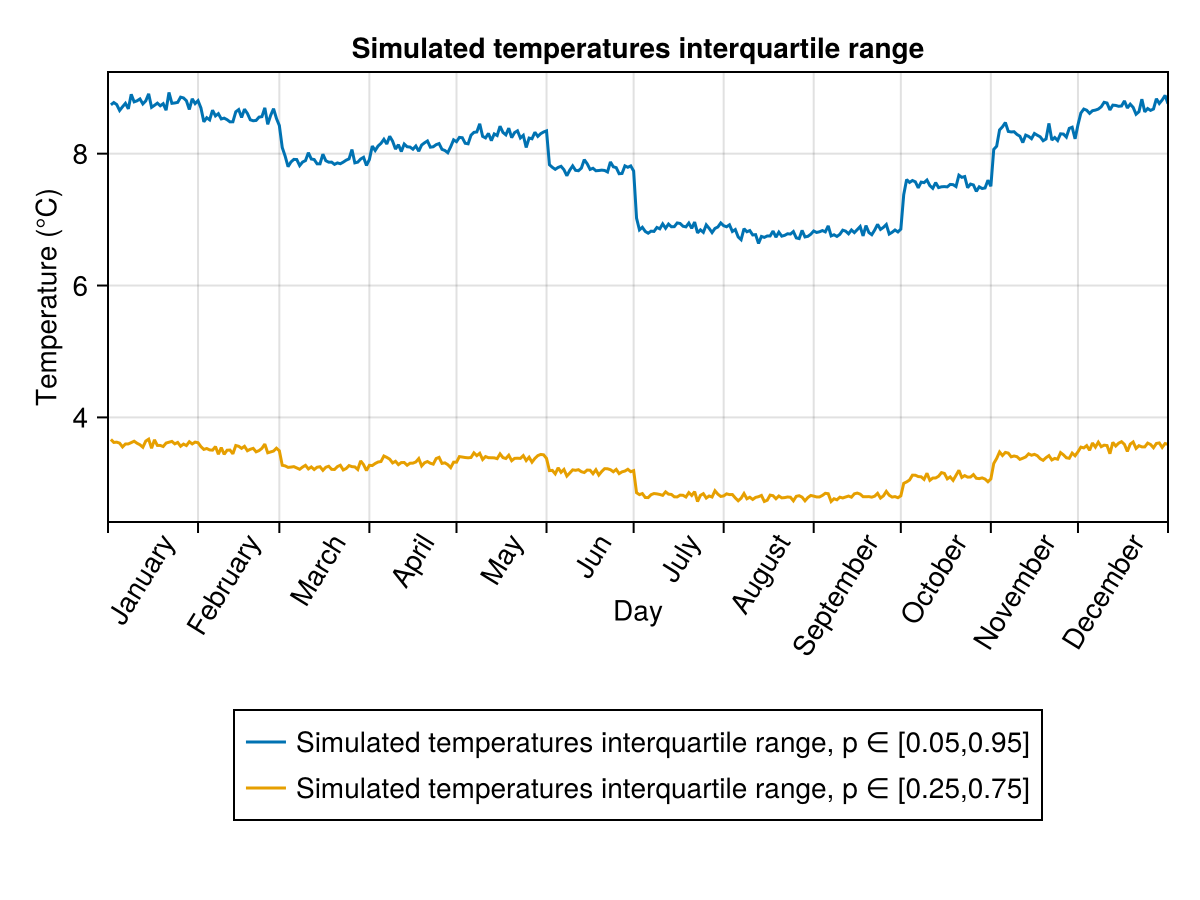

In [92]:
PlotYearCurves([quantile.(sample_concat,0.95) .- quantile.(sample_concat,0.05) , quantile.(sample_concat,0.75) .- quantile.(sample_concat,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
)

We see clearly that interquartile range is shorter during summer and larger during winter.

### With sum of likelihoods

In [93]:
sample_sumLL = SimulateYears(Monthly_undrifted[1][1][1],series.DATE[1],Φ_month_sumLL,σ_month_sumLL, 100 * 105)
sample_sumLL = invert(sample_sumLL + repeat([average_period],length(sample_sumLL))) 

365-element Vector{Vector{Float64}}:
 [-11.458393321605275, -9.912912211559188, -6.106158419651633, -4.821285759247357, -8.807828713063685, -7.133889397573352, -9.885782143113325, -9.13307143616585, -14.779273509813404, -9.227340781440033  …  -10.390325017228768, -4.873756233123348, -8.585532488419165, -5.818122612695251, -8.236075817631372, -8.855832196349784, -11.306801946056925, -3.538013033785945, -4.4768260214599565, -9.353423303824929]
 [-13.253217134770647, -7.348972555992482, -7.543473970716368, -6.7408843497148565, -6.559914559353874, -8.595151316597672, -5.595618427316864, -8.133452820999716, -9.274319173406536, -10.15978107711428  …  -12.371629706617, -8.354923582377562, -11.790704683487105, -3.538182116104264, -10.220499869471087, -9.421055701233644, -8.142914736147048, -4.230098687565826, -5.8978146055011855, -6.613739311368319]
 [-8.956656119935555, -4.068444487835047, -6.3318806324318135, -10.82431600973861, -9.643106374774868, -5.8283680449356075, -7.196981304503023, -9

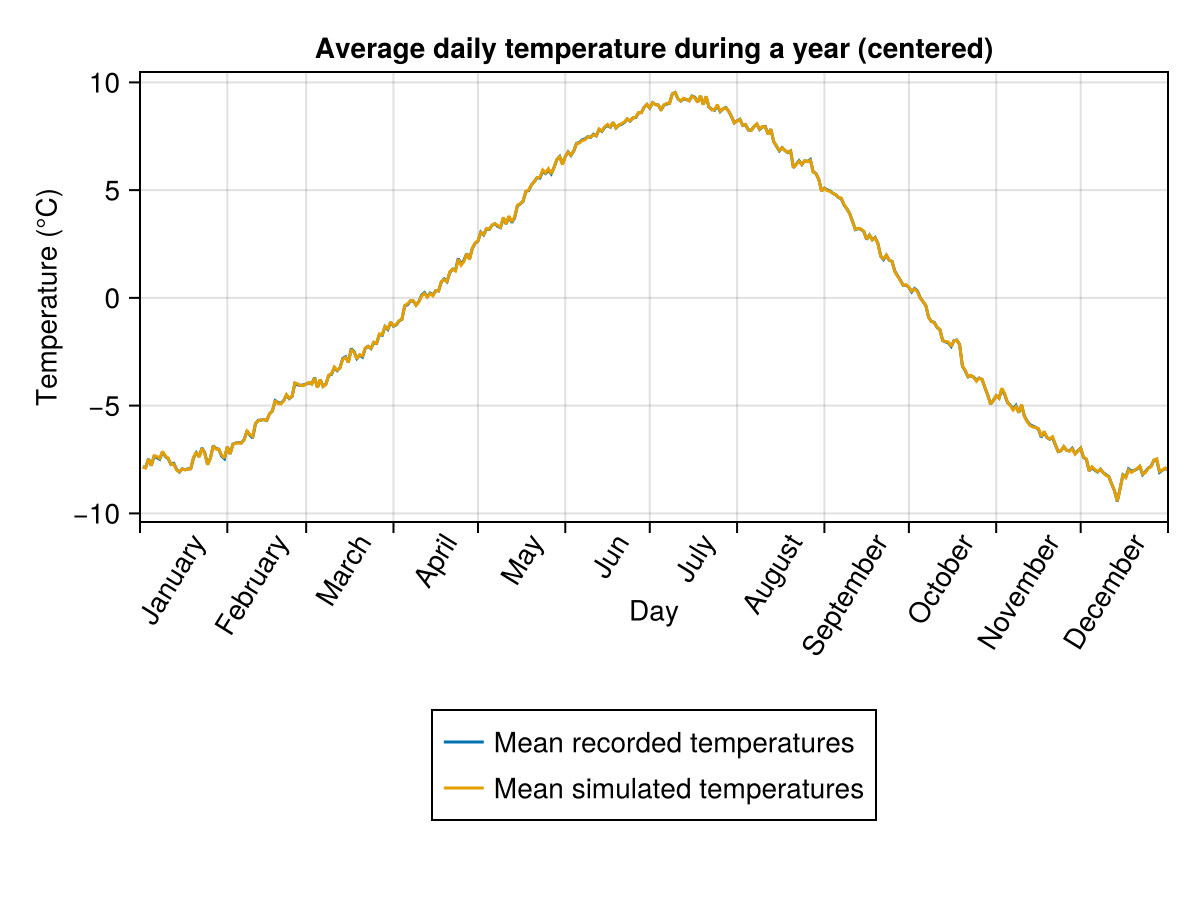

In [94]:
include("utils.jl")
PlotYearCurves([average_period,mean.(sample_sumLL)],["Mean recorded temperatures","Mean simulated temperatures"],"Average daily temperature during a year (centered)")

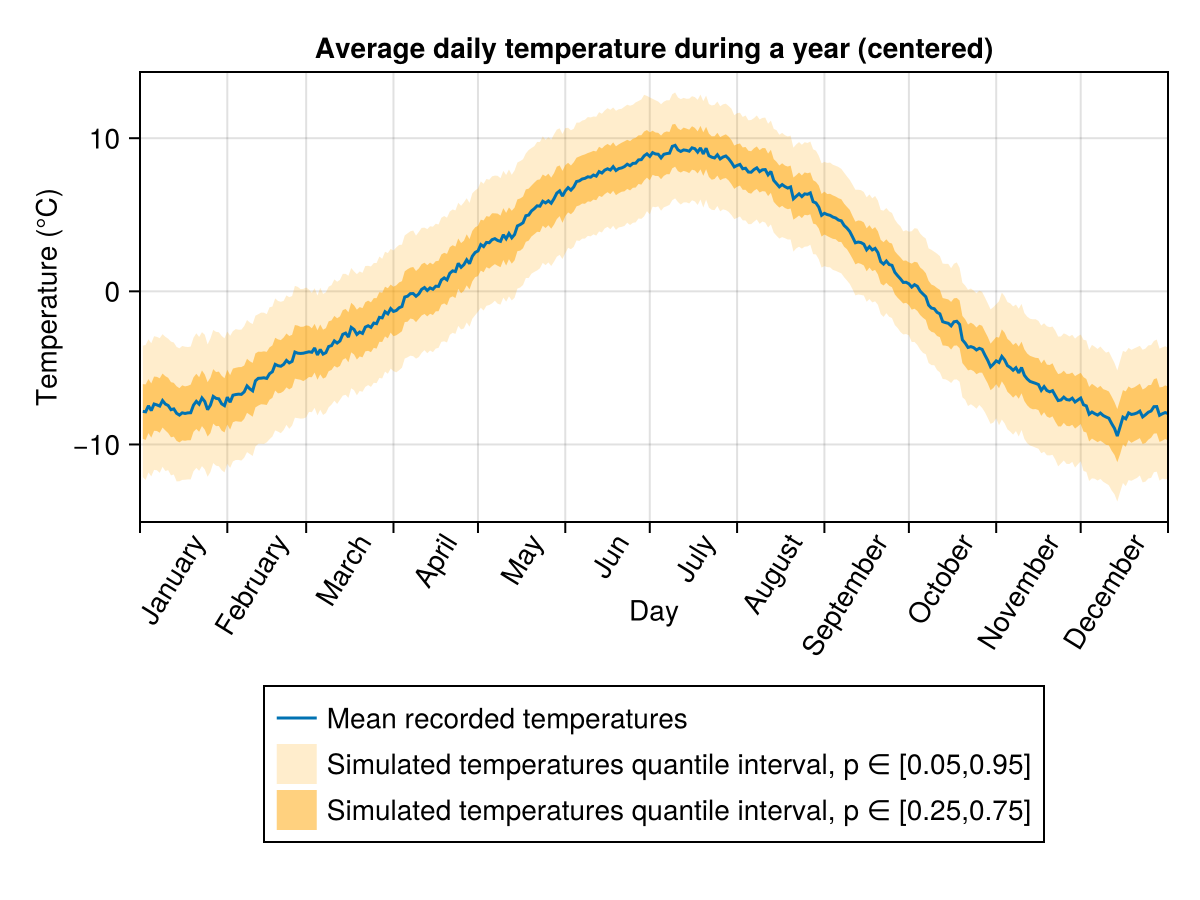

In [95]:
PlotYearCurves(average_period,
["Mean recorded temperatures","Simulated temperatures quantile interval, p ∈ [0.05,0.95]","Simulated temperatures quantile interval, p ∈ [0.25,0.75]"],
"Average daily temperature during a year (centered)",
[(quantile.(sample_sumLL,0.05),quantile.(sample_sumLL,0.95)),(quantile.(sample_sumLL,0.25),quantile.(sample_sumLL,0.75))],
[("orange",0.2),("orange",0.5)]
)

The interquartile range seems to change arount the year. Lets plotting it below : 

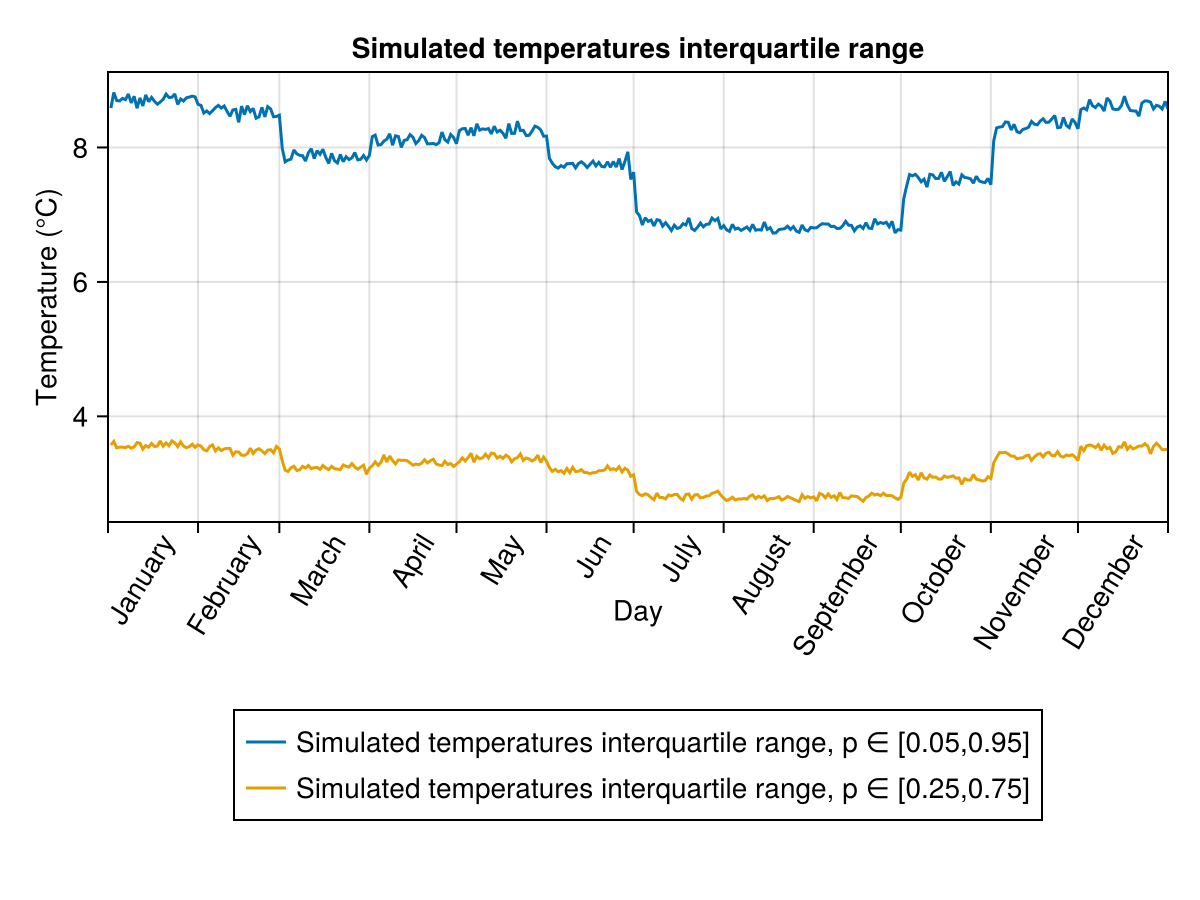

In [96]:
PlotYearCurves([quantile.(sample_sumLL,0.95) .- quantile.(sample_sumLL,0.05) , quantile.(sample_sumLL,0.75) .- quantile.(sample_sumLL,0.25)],
["Simulated temperatures interquartile range, p ∈ [0.05,0.95]" ,"Simulated temperatures interquartile range, p ∈ [0.25,0.75]"],
"Simulated temperatures interquartile range"
)

We see clearly that interquartile range is shorter during summer and larger during winter, for each of the three methods of estimations.